# **AI Project Cycle**



#**1.   Problem Scoping**

---
Menjelaskan mengenai latar belakang dari pembuatan AI Malnutrion Classfication






#**2.   Data Acquisition**

---
Sumber data diperoleh melalui github `https://github.com/sstevenadi/StuntingDataAnalysis.git`






#**3.   Data Exploration**

---
Tahapan ini masuk ke dalam tahapan preprocessing data


In [1]:
#Menampilkan Grafik
import matplotlib.pyplot as plt
import seaborn as sns

#Data Transformation
import pandas as pd
import numpy as np

#Membantu dalam pembuatan model dan mempersiapkan data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix

#Model yang digunakan
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

#Magic line untuk matplotlib
%matplotlib inline

In [2]:
#Membaca data
url = ('https://raw.githubusercontent.com/kilua762/malnutrition-classification/main/Data/Stunting.xlsx')
data_stunting = pd.read_excel(url)

In [3]:
#Didalam data terdapat beberapa char non-ascii jadi di hilangkan dahulu
data_stunting = data_stunting.applymap(lambda x : x.replace('\xa0', '') if type(x) == str else x)

data_stunting.sample(10)

,NIK,Nama,JK,Tgl Lahir,BB Lahir,TB Lahir,Nama Ortu,Prov,Kab/Kota,Kec,...,ZS BB/U,TB/U,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,PMT Diterima (kg),Jml Vit A,KPSP,KIA
34,5305420612170001,PAULO D. BALA,L,2017-12-06,3,0,KLAUDIUS METBOKI,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.42,Pendek,-2.18,Gizi Baik,-1.74,T,0,1.0,-,-
252,5305422012209544,DEVANTUS NAIHELI,L,2020-12-20,2.1,45,MARIA G NAIHELI,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-4.88,Sangat Pendek,-5.44,Gizi Kurang,-3.00,N,0,1.0,-,-
72,5305426105180001,EUGENIA KEKE,P,2018-05-21,2.6,0,LODOBERTUS NEONNUB,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.32,Pendek,-2.74,Gizi Baik,0.46,N,0,1.0,-,-
273,5305421202209929,ABRAHAM F. FALLO,L,2020-02-12,2,47,IRTO FALLO,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.17,Sangat Pendek,-3.49,Gizi Baik,-0.54,N,0,1.0,-,-
141,5305426010197709,CELIN A. FUTAUNI,P,2019-10-20,2.8,NaN,OKTA V. FUTAUNI,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.32,Sangat Pendek,-3.33,Gizi Baik,-0.54,T,0,1.0,-,-
207,5305422803180000,MARTINUS LUTI,L,2018-03-28,2.6,0,WENSESLAUS AFOAN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.72,Pendek,-2.83,Gizi Baik,-1.66,T,0,1.0,-,-
85,5305423011170000,ANDREAS N. NAILAKE,L,2017-11-30,2.9,0,TEOFANUS NAILAKE,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-3.32,Pendek,-2.49,Gizi Kurang,-2.98,T,0,1.0,-,-
111,5305422601180001,TIMOTIUS R. NOPO,L,2018-01-26,3,NaN,GABRIEL MANEK,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.86,Sangat Pendek,-3.17,Gizi Baik,-1.52,T,0,1.0,-,-
267,5305423101217454,STEVEN J. METBOKI,L,2021-01-31,2.9,49,JONISIUS METBOKI,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.29,Pendek,-2.26,Gizi Baik,-1.60,T,-,1.0,-,-
212,53054210011900,JANUARIUS METBOKI,L,2019-01-10,3,NaN,PAULUS METBOKI,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.60,Pendek,-2.40,Gizi Baik,-0.39,N,0,1.0,-,-


In [4]:
#Melihat info data
data_stunting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NIK                 311 non-null    object 
 1   Nama                311 non-null    object 
 2   JK                  311 non-null    object 
 3   Tgl Lahir           311 non-null    object 
 4   BB Lahir            311 non-null    object 
 5   TB Lahir            217 non-null    object 
 6   Nama Ortu           311 non-null    object 
 7   Prov                311 non-null    object 
 8   Kab/Kota            311 non-null    object 
 9   Kec                 311 non-null    object 
 10  Pukesmas            311 non-null    object 
 11  Desa/Kel            311 non-null    object 
 12  Posyandu            311 non-null    object 
 13  RT                  193 non-null    float64
 14  RW                  193 non-null    float64
 15  Alamat              311 non-null    object 
 16  Usia Saa

In [5]:
#Melihat data yang tidak ada nilainya atau null
data_stunting.isna().sum()

NIK                     0
Nama                    0
JK                      0
Tgl Lahir               0
BB Lahir                0
TB Lahir               94
Nama Ortu               0
Prov                    0
Kab/Kota                0
Kec                     0
Pukesmas                0
Desa/Kel                0
Posyandu                0
RT                    118
RW                    118
Alamat                  0
Usia Saat Ukur          0
Tanggal Pengukuran      0
Berat                   0
Tinggi                  0
LiLA                   26
BB/U                    0
ZS BB/U                 0
TB/U                    0
ZS TB/U                 0
BB/TB                   0
ZS BB/TB                0
Naik Berat Badan        0
PMT Diterima (kg)       0
Jml Vit A              25
KPSP                    1
KIA                     0
dtype: int64

In [6]:
# #Mengatasi data yang tidak ada nilainya
# data_stunting.dropna()

In [7]:
#Melihat data presentase BB/U 
data_stunting['BB/U'].value_counts()/data_stunting.shape[0]*100

Kurang                51.446945
Berat Badan Normal    33.440514
Sangat Kurang         15.112540
Name: BB/U, dtype: float64

In [8]:
#Melihat data presentase TB/U 
data_stunting['TB/U'].value_counts()/data_stunting.shape[0]*100

Pendek           80.385852
Sangat Pendek    19.614148
Name: TB/U, dtype: float64

In [9]:
#Melihat data presentase BB/TB
data_stunting['BB/TB'].value_counts()/data_stunting.shape[0]*100

Gizi Baik            81.993569
Gizi Kurang          15.434084
Risiko Gizi Lebih     1.929260
Gizi Lebih            0.643087
Name: BB/TB, dtype: float64

In [10]:
#Untuk mengubah data kategorical menjadi angka
le = LabelEncoder()

data_stunting['BB/U'] = le.fit_transform(data_stunting['BB/U']) #Kurang , Berat Badan Normal
data_stunting['TB/U'] = le.fit_transform(data_stunting['TB/U']) #Sangat Pendek, Pendek
data_stunting['BB/TB'] = le.fit_transform(data_stunting['BB/TB']) #Gizi Baik, Risiko Gizi Lebih

data_stunting.head()

,NIK,Nama,JK,Tgl Lahir,BB Lahir,TB Lahir,Nama Ortu,Prov,Kab/Kota,Kec,...,ZS BB/U,TB/U,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,PMT Diterima (kg),Jml Vit A,KPSP,KIA
0,5305424212170000,MARYELA TETHUN,P,2017-12-02,2.9,48,FIDELIS TETHUN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.93,1,-3.42,0,-1.16,N,0,1.0,-,-
1,5305422807170000,KRISTIAN J. NAIAKI,L,2017-07-28,0,0,EDUARDUS OE,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.57,1,-3.86,3,1.23,N,0,1.0,-,-
2,5305420203180000,MARVILIANO ANAPAH,L,2018-03-02,0,0,GASPAR ANTOIN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.83,0,-2.95,0,-1.70,N,0,1.0,-,-
3,5303205004170001,VERA CLARISCA TAONE,P,2017-04-10,0,0,DALMASIUS ELAN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.72,0,-2.25,0,-1.98,T,0,1.0,-,-
4,5305425205180000,VALENSIA K. OEBNAMAN,P,2018-05-12,2.8,0,VIDELIS OEBNAMA,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.90,0,-2.41,0,-0.68,T,0,1.0,-,-


In [11]:
#Mengubah value 0 pada BB Lahir menjadi median
data_stunting['BB Lahir'] = pd.to_numeric(data_stunting['BB Lahir'])
data_stunting['BB Lahir'] = data_stunting['BB Lahir'].apply(lambda x : data_stunting['BB Lahir'].median() if x <= 0 else x)

data_stunting.head()

,NIK,Nama,JK,Tgl Lahir,BB Lahir,TB Lahir,Nama Ortu,Prov,Kab/Kota,Kec,...,ZS BB/U,TB/U,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,PMT Diterima (kg),Jml Vit A,KPSP,KIA
0,5305424212170000,MARYELA TETHUN,P,2017-12-02,2.9,48,FIDELIS TETHUN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.93,1,-3.42,0,-1.16,N,0,1.0,-,-
1,5305422807170000,KRISTIAN J. NAIAKI,L,2017-07-28,2.8,0,EDUARDUS OE,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.57,1,-3.86,3,1.23,N,0,1.0,-,-
2,5305420203180000,MARVILIANO ANAPAH,L,2018-03-02,2.8,0,GASPAR ANTOIN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.83,0,-2.95,0,-1.70,N,0,1.0,-,-
3,5303205004170001,VERA CLARISCA TAONE,P,2017-04-10,2.8,0,DALMASIUS ELAN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.72,0,-2.25,0,-1.98,T,0,1.0,-,-
4,5305425205180000,VALENSIA K. OEBNAMAN,P,2018-05-12,2.8,0,VIDELIS OEBNAMA,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.90,0,-2.41,0,-0.68,T,0,1.0,-,-


In [12]:
#Mengubah value 0 pada TB Lahir menjadi median
data_stunting['TB Lahir'] = pd.to_numeric(data_stunting['TB Lahir'])
data_stunting['TB Lahir'] = data_stunting['TB Lahir'].apply(lambda x : data_stunting['TB Lahir'].median() if x <= 0 else x)
data_stunting['TB Lahir'].fillna(data_stunting['TB Lahir'].median(), inplace=True)

data_stunting.head()

,NIK,Nama,JK,Tgl Lahir,BB Lahir,TB Lahir,Nama Ortu,Prov,Kab/Kota,Kec,...,ZS BB/U,TB/U,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,PMT Diterima (kg),Jml Vit A,KPSP,KIA
0,5305424212170000,MARYELA TETHUN,P,2017-12-02,2.9,48.0,FIDELIS TETHUN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.93,1,-3.42,0,-1.16,N,0,1.0,-,-
1,5305422807170000,KRISTIAN J. NAIAKI,L,2017-07-28,2.8,47.0,EDUARDUS OE,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.57,1,-3.86,3,1.23,N,0,1.0,-,-
2,5305420203180000,MARVILIANO ANAPAH,L,2018-03-02,2.8,47.0,GASPAR ANTOIN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.83,0,-2.95,0,-1.70,N,0,1.0,-,-
3,5303205004170001,VERA CLARISCA TAONE,P,2017-04-10,2.8,47.0,DALMASIUS ELAN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.72,0,-2.25,0,-1.98,T,0,1.0,-,-
4,5305425205180000,VALENSIA K. OEBNAMAN,P,2018-05-12,2.8,47.0,VIDELIS OEBNAMA,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.90,0,-2.41,0,-0.68,T,0,1.0,-,-


In [13]:
#Mengubah value usia menjadi sebuah angka
data_stunting['Usia Saat Ukur'] = data_stunting['Usia Saat Ukur'].apply(lambda x : float(x[0]))

data_stunting.head()

,NIK,Nama,JK,Tgl Lahir,BB Lahir,TB Lahir,Nama Ortu,Prov,Kab/Kota,Kec,...,ZS BB/U,TB/U,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,PMT Diterima (kg),Jml Vit A,KPSP,KIA
0,5305424212170000,MARYELA TETHUN,P,2017-12-02,2.9,48.0,FIDELIS TETHUN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.93,1,-3.42,0,-1.16,N,0,1.0,-,-
1,5305422807170000,KRISTIAN J. NAIAKI,L,2017-07-28,2.8,47.0,EDUARDUS OE,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.57,1,-3.86,3,1.23,N,0,1.0,-,-
2,5305420203180000,MARVILIANO ANAPAH,L,2018-03-02,2.8,47.0,GASPAR ANTOIN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.83,0,-2.95,0,-1.70,N,0,1.0,-,-
3,5303205004170001,VERA CLARISCA TAONE,P,2017-04-10,2.8,47.0,DALMASIUS ELAN,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-2.72,0,-2.25,0,-1.98,T,0,1.0,-,-
4,5305425205180000,VALENSIA K. OEBNAMAN,P,2018-05-12,2.8,47.0,VIDELIS OEBNAMA,NUSA TENGGARA TIMUR,TIMOR TENGAH UTARA,INSANA BARAT,...,-1.90,0,-2.41,0,-0.68,T,0,1.0,-,-


In [14]:
#Memilih kolom yang mempengaruhi data
data_stunting = data_stunting[['BB Lahir', 'TB Lahir', 'Usia Saat Ukur', 'Berat', 'Tinggi', "BB/U", "TB/U", "BB/TB"]]

data_stunting.head()

,BB Lahir,TB Lahir,Usia Saat Ukur,Berat,Tinggi,BB/U,TB/U,BB/TB
0,2.9,48.0,4.0,11.2,89.0,1,1,0
1,2.8,47.0,4.0,14.2,89.8,0,1,3
2,2.8,47.0,3.0,11.4,90.6,1,0,0
3,2.8,47.0,4.0,12.3,97.8,1,0,0
4,2.8,47.0,3.0,12.1,90.8,0,0,0


#**4.   Cluster Data dengan K-Means**

---


In [ ]:
#perhitungan cluster dengan k-means dan visualisasi dengan metode ELBOW
X_means = data_stunting.iloc[: ,[3, 4]].values

wcss = []
for i in range (1,11) :
  kmeans = KMeans(n_clusters= i, init = 'k-means++', random_state = 42)
  kmeans.fit(X_means)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('wcss')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


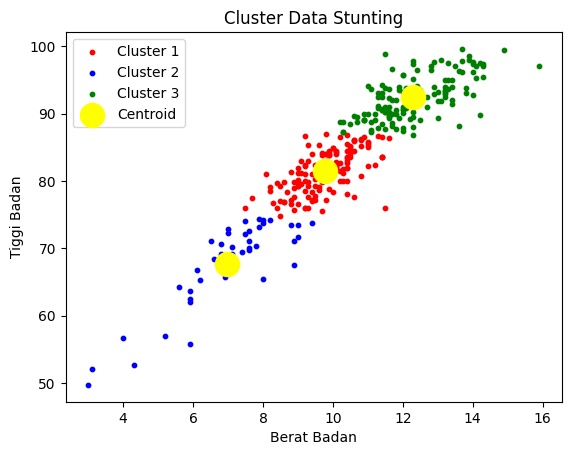

In [35]:
#Melihat Hasil Cluster dengan membaginya menjadi 3 Cluster
kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state=42)
Y_kmeans = kmeans.fit_predict(X_means)

plt.scatter(X_means[Y_kmeans == 0, 0], X_means[Y_kmeans == 0, 1], s = 10, c = 'red',  label = 'Cluster 1')
plt.scatter(X_means[Y_kmeans == 1, 0], X_means[Y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X_means[Y_kmeans == 2, 0], X_means[Y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c ='yellow', label = 'Centroid')

plt.title('Cluster Data Stunting')
plt.xlabel('Berat Badan')
plt.ylabel('Tiggi Badan')
plt.legend()
plt.show()

In [25]:
#prediksi dengan membagi 3 Cluster
Y_predicted = KMeans(n_clusters = 3).fit_predict(data_stunting[['Berat','Tinggi']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
data_stunting['Cluster'] = Y_predicted
data_stunting.sample(10)

,BB Lahir,TB Lahir,Usia Saat Ukur,Berat,Tinggi,BB/U,TB/U,BB/TB,Cluster
26,2.8,47.0,4.0,12.7,92.4,1,0,0,1
241,1.4,47.0,0.0,5.9,62.0,2,1,0,2
9,3.0,47.0,3.0,12.0,90.1,0,0,0,1
5,2.9,47.0,4.0,14.2,97.5,0,0,0,1
77,2.7,47.0,2.0,9.5,82.4,1,0,0,0
37,3.0,47.0,4.0,11.5,93.8,2,0,1,1
305,2.9,49.0,1.0,9.4,77.0,0,0,0,0
146,3.0,47.0,4.0,13.6,96.3,0,0,0,1
208,2.7,47.0,4.0,13.4,95.0,1,0,0,1
240,2.9,48.0,0.0,5.9,55.8,0,0,2,2


In [31]:
#Export File to .xlsx
data_stunting.to_excel("StuntingCluster.xlsx", sheet_name='Data_stunting')  

In [36]:
df = pd.read_excel('StuntingCluster.xlsx')
df.head(10)

,Unnamed: 0,BB Lahir,TB Lahir,Usia Saat Ukur,Berat,Tinggi,BB/U,TB/U,BB/TB,Cluster
0,0,2.9,48.0,4,11.2,89.0,1,1,0,1
1,1,2.8,47.0,4,14.2,89.8,0,1,3,1
2,2,2.8,47.0,3,11.4,90.6,1,0,0,1
3,3,2.8,47.0,4,12.3,97.8,1,0,0,1
4,4,2.8,47.0,3,12.1,90.8,0,0,0,1
5,5,2.9,47.0,4,14.2,97.5,0,0,0,1
6,6,2.2,47.0,3,9.3,85.3,2,1,1,0
7,7,2.7,48.0,3,10.3,88.8,1,0,1,1
8,8,3.2,47.0,3,11.0,85.7,1,0,0,0
9,9,3.0,47.0,3,12.0,90.1,0,0,0,1
